In [8]:
import pandas as pd
penguins_init = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins=penguins_init.dropna()
culmen_columns = ["bill_length_mm", "bill_depth_mm"]
target_column = "species"

In [9]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [10]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


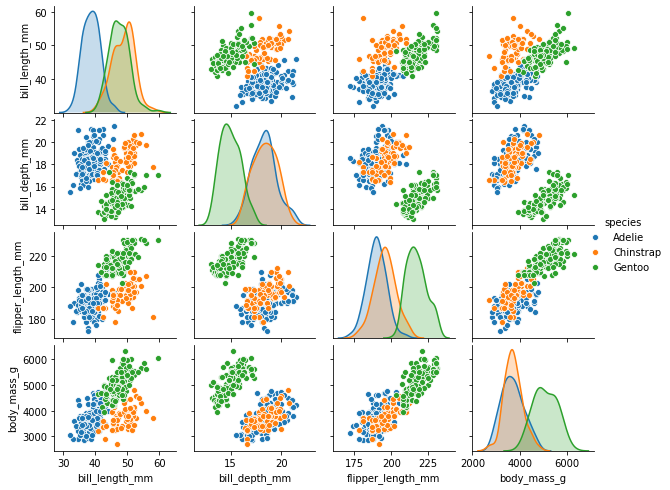

In [11]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

In [12]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
ping_tree = DecisionTreeClassifier(max_depth=2)
ping_tree.fit(data_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
data_pred = ping_tree.predict(data_test)

In [17]:
print("Train data accuracy:",accuracy_score(y_true = data_train, y_pred=ping_tree.predict(data_train)))
print("Test data accuracy:",accuracy_score(y_true = data_test, y_pred=data_pred))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
test_score = ping_tree.fit(data_train, target_train).score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

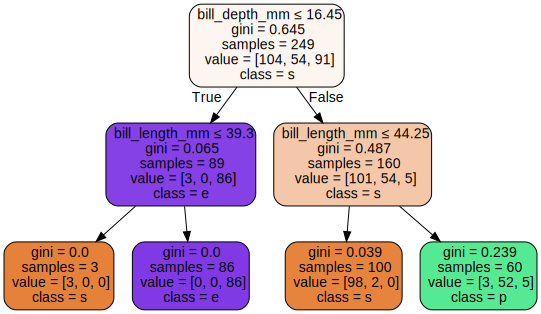

In [14]:
dot_data = tree.export_graphviz(ping_tree, out_file=None, 
                     feature_names=culmen_columns,  
                     class_names=target_column,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,
    stratify=y,
    random_state=66)
training_accuracy = []
test_accuracy = []

In [23]:
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

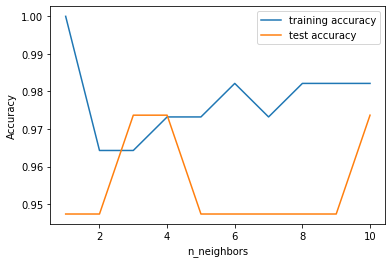

In [24]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label= "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
data_house = load_boston()

In [50]:
print(data_house.data.shape)
# Extracting Attributes / Features
X = data_house.data
# Extracting Target / Class Labels
y = data_house.target
data_house.DESCR

(506, 13)


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [52]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.77
Test set score: 0.64


In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.77
Test set score: 0.63


In [54]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f} ".format(ridge10.score(X_test,y_test)))

Training set score: 0.76
Test set score: 0.61 


In [55]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.77
Test set score: 0.63


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.69
Test set score: 0.65
Number of features used: 10


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new shape: {}".format(X_new.shape))

X_new shape: (1, 4)


In [63]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name:{}".format(data['target_names'][prediction]))

Prediction: [0]
Predicted target name:['setosa']


In [64]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))

Test set predictions:
[1 2 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2 2 1 1 2 0 0 1
 1]
Test set score: 0.95


In [65]:
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.95


In [10]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,100)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

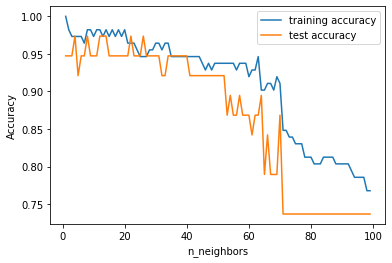

In [11]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label= "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

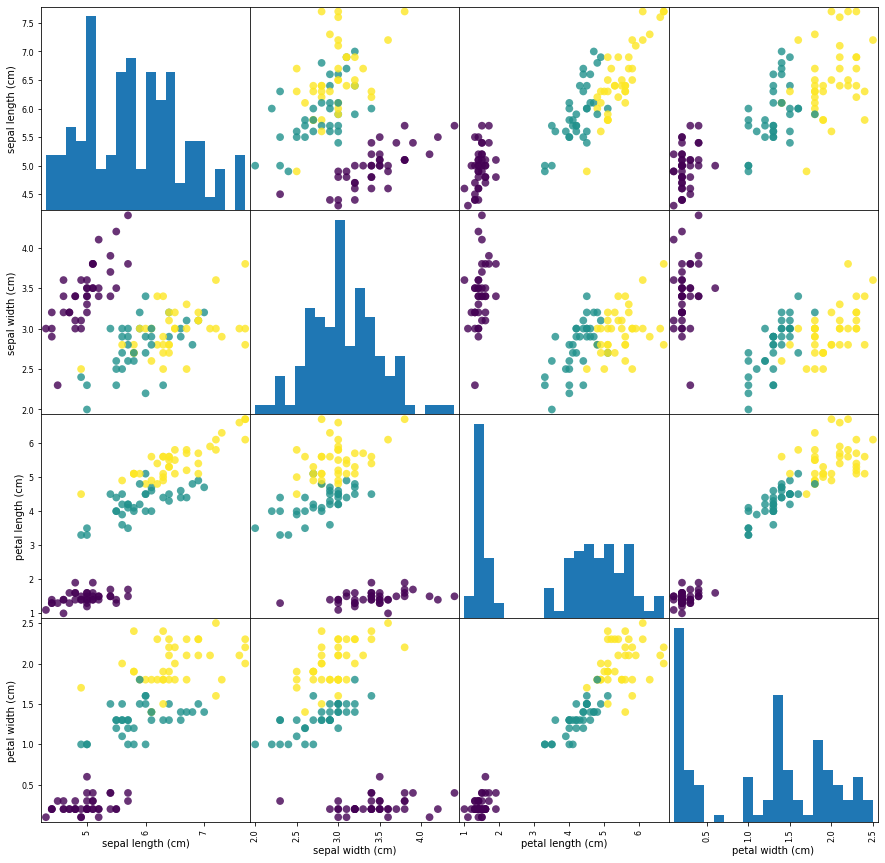

In [7]:
import pandas as pd
import pandas.plotting as pdpl
iris_dataframe = pd.DataFrame(X_train, columns =
data.feature_names)
grr = pdpl.scatter_matrix(iris_dataframe,c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha = 0.8)